# Testing our Neural Network
Building off PA4, let's test our neural network on the MNIST dataset.
We'll start by installing our dependencies

In [1]:
%pip install numpy keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from keras.utils import to_categorical


def preprocess_data(
    x: np.ndarray, y: np.ndarray, limit: int
) -> tuple[np.ndarray, np.ndarray]:
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype('float32') / 255
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]

In [3]:
from keras.datasets import mnist
from neural_network.dataset import Dataset


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 1_000)
x_test, y_test = preprocess_data(x_test, y_test, 100)

train_set = Dataset(xs=x_train, ys=y_train)
test_set = Dataset(xs=x_test, ys=y_test)

Epoch 10/100 | Average Error 0.01651931811688792 | Average Accuracy 0.967
Epoch 20/100 | Average Error 0.00993405043270313 | Average Accuracy 0.993
Epoch 30/100 | Average Error 0.006670616968278239 | Average Accuracy 0.998
Epoch 40/100 | Average Error 0.005136284768587378 | Average Accuracy 0.999
Epoch 50/100 | Average Error 0.0043580701976570465 | Average Accuracy 0.999
Epoch 60/100 | Average Error 0.0038937146002076877 | Average Accuracy 0.999
Epoch 70/100 | Average Error 0.0036123828590573295 | Average Accuracy 1.0
Epoch 80/100 | Average Error 0.0034017090157100302 | Average Accuracy 1.0
Epoch 90/100 | Average Error 0.0033606444729727338 | Average Accuracy 1.0
Epoch 100/100 | Average Error 0.0028949298994722684 | Average Accuracy 1.0


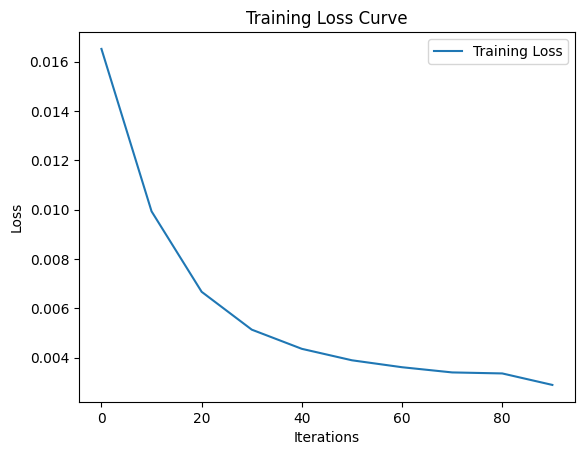

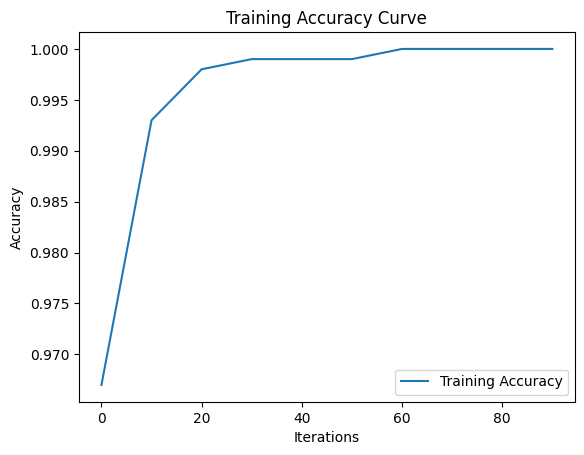

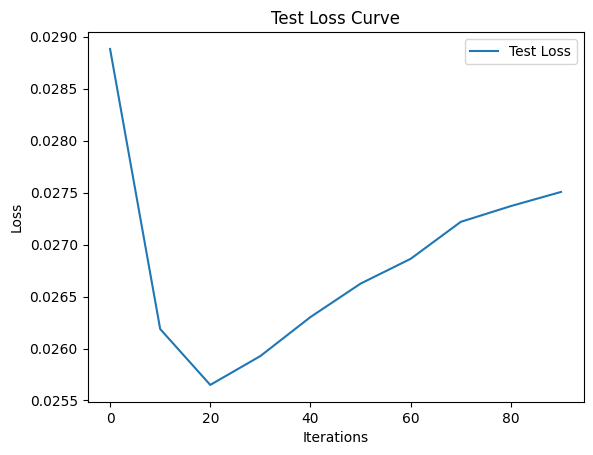

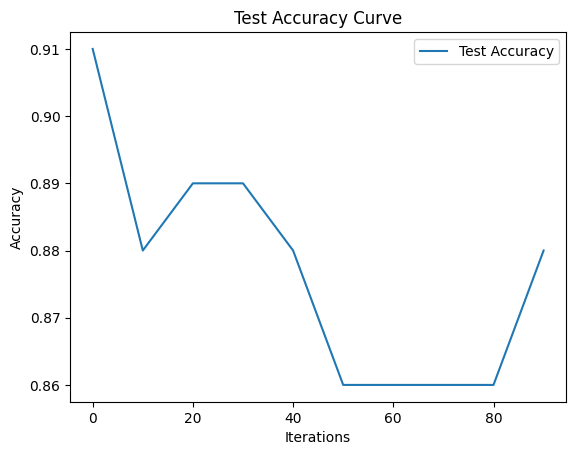

In [4]:
from neural_network.layer import Dense
from neural_network.activation_functions import Tanh
from neural_network.loss_functions import MSE
from neural_network.model import Model

model = Model(
    network=[Dense(28 * 28, 40), Tanh(), Dense(40, 10), Tanh()],
    loss_function=MSE(),
    learning_rate=1e-1,
)

evaluation = model.train(train_set=train_set, test_set=test_set, epochs=100, eval_training_every=10)

evaluation.losses.plot_training_loss_curve()

evaluation.accuracies.plot_training_accuracy_curve()

evaluation.losses.plot_testing_loss_curve()

evaluation.accuracies.plot_testing_accuracy_curve()